# Multilayer Perceptron for MNIST Image Classification

## By Gabriel Padilla Haro 

### 1. Importing packages


We will proceed to import the essential packages required for the training of the model.

In [ ]:
#!pip install matplotlib
#!pip install numpy
#!pip install tensorflow

import os 
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical      # Previously, it belonged to np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import load_model

**IMPORTANT NOTE:** The code is not fully reproducible due to the inherent randomness in the processes executed by this algorithm, although very similar results can be obtained if the training parameters remain unchanged.


### 2. Dataset loading

First, we load the MNIST dataset. This can be done directly with the help of the `keras` package.

In [164]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Each observation contains information about the 28×28 pixels (784 pixels per image) represented by an integer between 0 (black) and 255 (white), with intermediate values representing shades of gray. Let us examine how many images are available.

In [165]:
print(f'Number of training examples: {len(X_train)}')
print(f'Number of test examples: {len(X_test)}')

Number of training examples: 60000
Number of test examples: 10000


We observe that there are 60,000 training images and 10,000 test images.

### 3. Example Visualization

Let us examine a few examples from the dataset to get an idea of their structure.

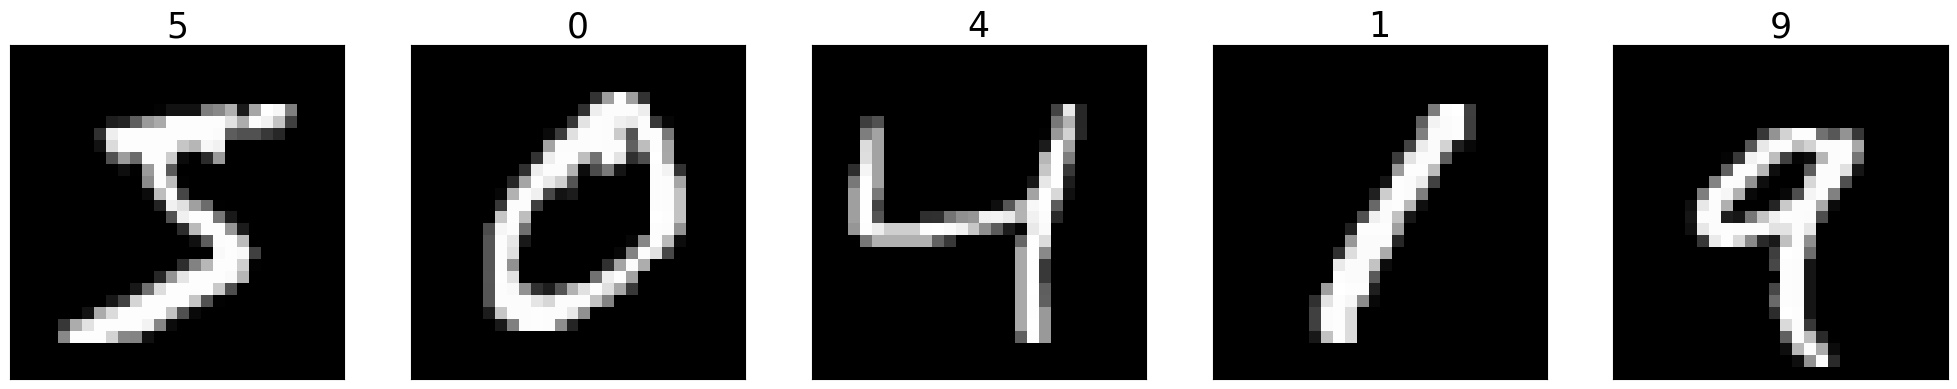

In [166]:
# Plot the images in the sample
figure = plt.figure(figsize=(25, 25))

for i in range(5):
    ax = figure.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(y_train[i], fontsize=25)

Let us take a closer look at the detailed information the computer stores for each pixel in the image.

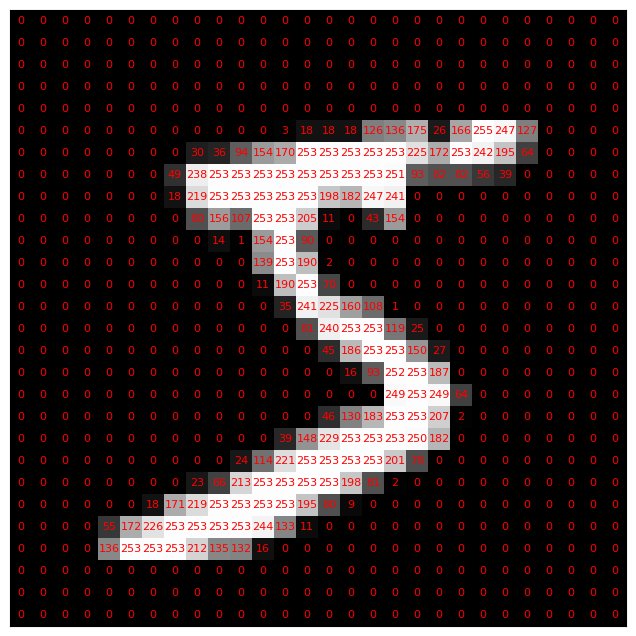

In [167]:
example=X_train[0]

figure=plt.figure(figsize=(8,8))
ax=figure.add_subplot(1,1,1,xticks=[], yticks=[])
ax.imshow(example, cmap='gray')

for x in range(28):
        for y in range(28):
            value = example[x][y]
            ax.annotate(f'{value}', 
                        xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center', fontsize=8,
                       color='red')

### 4. Data normalization

To improve performance and accelerate convergence, it is advisable to normalize the data based on the information of each pixel. The simplest way to achieve this is as follows.

In [168]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Let us observe how the previous representation changes after normalization.

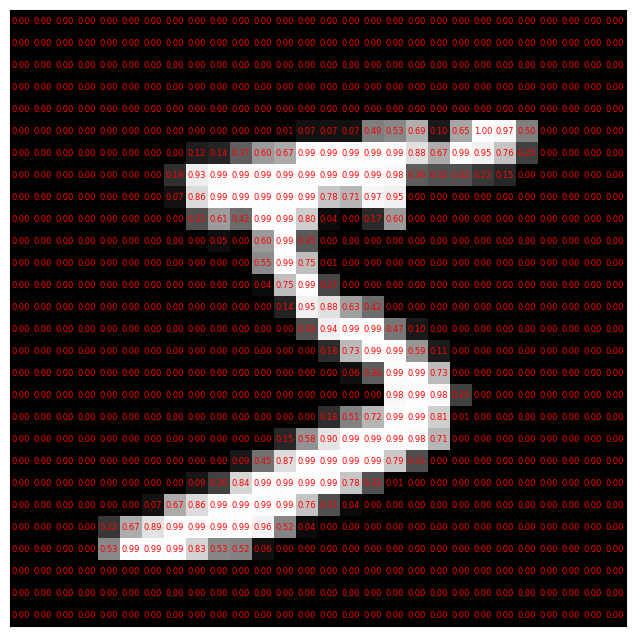

In [169]:
example=X_train[0]

figure=plt.figure(figsize=(8,8))
ax=figure.add_subplot(1,1,1,xticks=[], yticks=[])
ax.imshow(example, cmap='gray')

for x in range(28):
        for y in range(28):
            value = example[x][y]
            ax.annotate(f'{value:.2f}', 
                        xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center', fontsize=6,
                       color='red')

### 5. One-hot encoding

We will transform the target variable into a non-ordinal categorical variable using one-hot encoding, so that the network does not interpret the labels in an ordered manner. Additionally, we will use categorical cross-entropy as the network's loss function, which requires the categories to be represented in this format. To achieve this, we will use a function provided by `keras`.

In [170]:
print('Sample of original labels:')
print(y_train[:10])

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('Sample of one-hot encoded labels:')
print(y_train[:10])

Sample of original labels:
[5 0 4 1 9 2 1 3 1 4]
Sample of one-hot encoded labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Model Architecture

Let us define the architecture of our neural network. It consists of two hidden layers with 256 neurons each, using the ReLU (Rectified Linear Unit) activation function, and an output layer with 10 neurons (corresponding to the number of classes), where the softmax function is used as the activation. Additionally, two Dropout regularizations with a rate of 20% are applied to the model to prevent overfitting.

In [171]:
# Model definition
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Model summarization
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

We can observe that a total of 269,322 parameters have been estimated, including both weights and biases.

### 7. Compilation and Training

Let us compile the model with the following specifications:

- **Loss function:** Categorical cross-entropy, commonly used in multi-class problems with one-hot encoding.

- **Optimizer:** Adam, which adjusts the way weights and biases are updated to accelerate convergence.

- **Accuracy metric:** Accuracy.

In [172]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Next, we train the model using our training images. We will define a _callback_ to save the model that achieves the highest accuracy on the validation data. We will reserve 20% of the training data for this purpose.

In [173]:
if not os.path.exists('saved_models'):
    os.mkdir('saved_models')
    
PATH = 'saved_models/mlp_1.keras'

# Callback definition
checkpointer = ModelCheckpoint(
    filepath=PATH,
    monitor='val_accuracy',     
    mode='max',               
    save_best_only=True         
)

# Training
BATCH_SIZE = 256
EPOCHS = 10
history = model.fit(X_train, 
                          y_train, 
                          batch_size=BATCH_SIZE,    
                          validation_split=0.2,     
                          epochs=EPOCHS,           
                          callbacks=[checkpointer],
                          shuffle=True)             # Shuffle the samples

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8717 - loss: 0.4332 - val_accuracy: 0.9497 - val_loss: 0.1741
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9461 - loss: 0.1773 - val_accuracy: 0.9632 - val_loss: 0.1224
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9622 - loss: 0.1248 - val_accuracy: 0.9689 - val_loss: 0.0995
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9707 - loss: 0.0972 - val_accuracy: 0.9724 - val_loss: 0.0912
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9766 - loss: 0.0769 - val_accuracy: 0.9751 - val_loss: 0.0813
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9794 - loss: 0.0655 - val_accuracy: 0.9770 - val_loss: 0.0805
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9829 - loss: 0.0533 - val_accuracy: 0.9768 - val_loss: 0.0750
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9845 - loss: 0.0470 - val_accuracy: 0.

### 8. Final Model and Test Evaluation


We load the model that performed best on the validation set.

In [174]:
MODEL_PATH = 'saved_models/mlp_1.keras'

try:
    model = load_model(MODEL_PATH)
    model.summary()
    
except FileNotFoundError:
    print(f"Error: The file was not found at the path: {MODEL_PATH}")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")



Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807,968 (3.08 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,646 (2.05 MB)

Finally, we measure the accuracy of this model.

In [175]:
score = model.evaluate(X_test, y_test)

print(f'Test accuracy: {100 * score[1]}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9796 - loss: 0.0712
Test accuracy: 97.96000123023987


### 9. Accuracy visualization

We can visualize the accuracy on the training and validation sets for each epoch to observe whether overfitting is occurring.

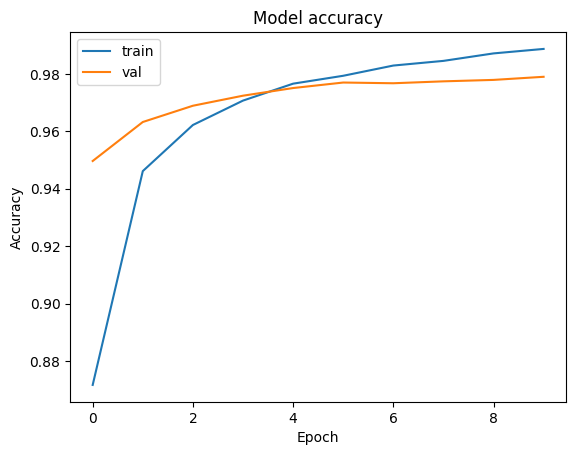

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

It is very likely that the training accuracy will increase with the number of epochs. However, it is important to check whether the same occurs with the validation accuracy; if not, this indicates that overfitting may be occurring.

### 10. Visualization of Errors

Let us display some of the digits that the model has misclassified.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of errors: 204


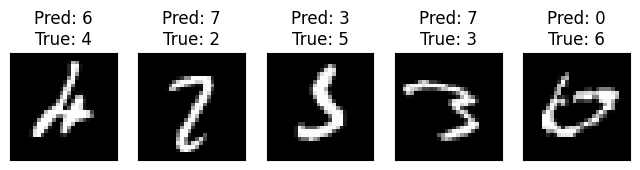

In [177]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test,axis=1)

incorrect_index = np.where(y_pred_classes != y_true)[0]

print(f"Number of errors: {len(incorrect_index)}")

figure=plt.figure(figsize=(8,8))
            
for i, idx in enumerate(incorrect_index[:5]):
    ax=figure.add_subplot(1,5,i+1,xticks=[], yticks=[])
    ax.set_title(f"Pred: {y_pred_classes[idx]}\nTrue: {y_true[idx]}")
    ax.imshow(X_test[idx], cmap='gray')


We observe that, indeed, some of the digits that are misclassified are genuinely ambiguous, which suggests that the neural network's performance is good.

### 11. Gaussian Noise

Next, we will introduce Gaussian noise to our image dataset and run a neural network with the same parameters in order to measure how its performance changes. First, let us create a function that adds Gaussian noise to the data.

In [178]:
def add_gaussian_noise(X, mean=0, std_dev=0.1):
    
    noise = np.random.normal(loc=mean, scale=std_dev, size=X.shape)
    
    X_noisy = X + noise
    
    X_noisy = np.clip(X_noisy, 0.0, 1.0)
    
    return X_noisy

Let us apply this noise to our training and test sets and compare, through a visualization, an image with and without noise. We will use the default values of our function.

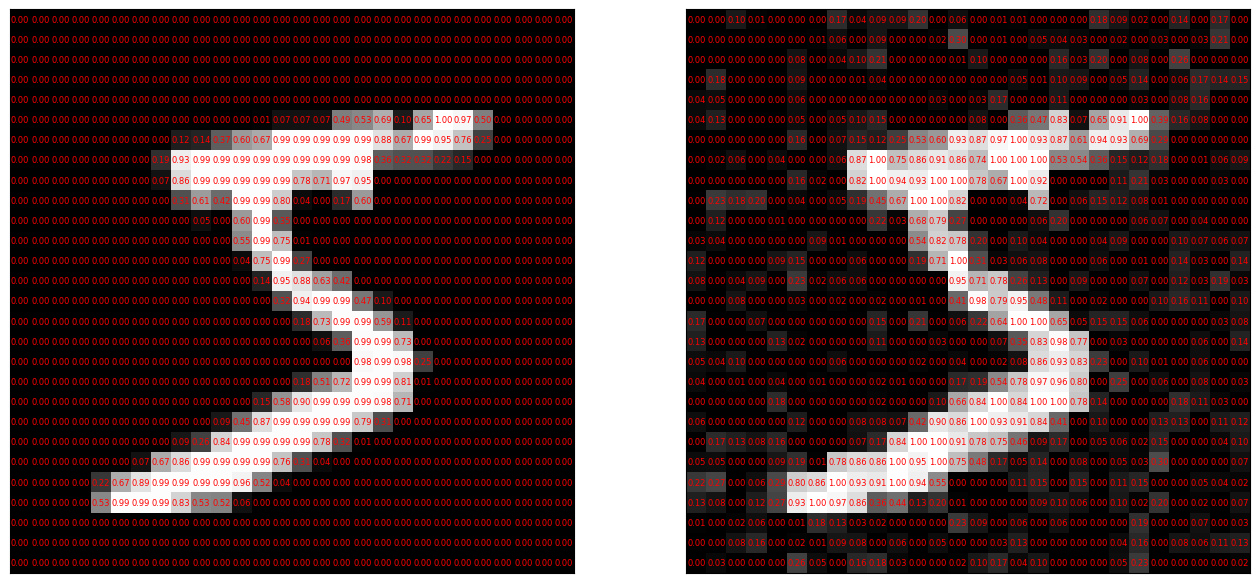

In [179]:
X_train_noisy=add_gaussian_noise(X_train)
X_test_noisy=add_gaussian_noise(X_test)

example_1=X_train[0]
example_2=X_train_noisy[0]

figure=plt.figure(figsize=(16,16))
ax1=figure.add_subplot(1,2,1,xticks=[], yticks=[])
ax2=figure.add_subplot(1,2,2,xticks=[], yticks=[])

ax1.imshow(example_1, cmap='gray')
ax2.imshow(example_2, cmap='gray')

for x in range(28):
    for y in range(28):
        value_1 = example_1[x][y]
        value_2 = example_2[x][y]
        ax1.annotate(f'{value_1:.2f}', 
            xy=(y,x),
            horizontalalignment='center',
            verticalalignment='center', fontsize=6,
            color='red')
        ax2.annotate(f'{value_2:.2f}', 
            xy=(y,x),
            horizontalalignment='center',
            verticalalignment='center', fontsize=6,
            color='red')

In an entirely analogous manner, let us use these new data to train a neural network with the same characteristics as before.

In [180]:
# Model definition
model = Sequential()
model.add(Flatten(input_shape=X_train_noisy.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Model summarization
model.summary()

# Compilation
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
PATH = 'saved_models/mlp_1_noisy.keras'

# Callback definition
checkpointer = ModelCheckpoint(
    filepath=PATH,  
    monitor='val_accuracy',     
    mode='max',                
    save_best_only=True)     

# Training
BATCH_SIZE = 256
EPOCHS = 10
history = model.fit(X_train_noisy, 
                          y_train, 
                          batch_size=BATCH_SIZE,   
                          validation_split=0.2,    
                          epochs=EPOCHS,            
                          callbacks=[checkpointer],
                          shuffle=True)             

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8580 - loss: 0.4747 - val_accuracy: 0.9477 - val_loss: 0.1833
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9430 - loss: 0.1896 - val_accuracy: 0.9628 - val_loss: 0.1299
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9610 - loss: 0.1296 - val_accuracy: 0.9676 - val_loss: 0.1071
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9703 - loss: 0.0985 - val_accuracy: 0.9678 - val_loss: 0.1047
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9769 - loss: 0.0769 - val_accuracy: 0.9707 - val_loss: 0.0971
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9805 - loss: 0.0632 - val_accuracy: 0.9707 - val_loss: 0.0977
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9836 - loss: 0.0519 - val_accuracy: 0.9729 - val_loss: 0.0925
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9861 - loss: 0.0427 - val_accuracy: 0.

We load the model that achieved the best performance on the validation set.

In [181]:
MODEL_PATH = 'saved_models/mlp_1_noisy.keras'

try:
    model = load_model(MODEL_PATH)
    model.summary()
    
except FileNotFoundError:
    print(f"Error: The file was not found at the path: {MODEL_PATH}")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807,968 (3.08 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,646 (2.05 MB)

And we measure its accuracy on the test set.

In [182]:
score = model.evaluate(X_test_noisy, y_test)
print(f'Test accuracy: {100 * score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9753 - loss: 0.0880
Test accuracy: 97.53000140190125


Out of curiosity, let us check the error we would obtain if we use the noise-free data as the test set.

In [183]:
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {100 * score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0951
Test accuracy: 97.40999937057495


### 12. Model Robustness

With the aim of assessing whether we can improve the model's robustness, we can use the previously proposed technique for data augmentation, that is, training a model using both the original and the noisy training data. Let us see what happens.

In [184]:
X_train_complete=np.concatenate((X_train,X_train_noisy))
y_train_complete=np.concatenate((y_train,y_train))

# Model definition
model = Sequential()
model.add(Flatten(input_shape=X_train_complete.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Model summarization
model.summary()

# Compilation
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
PATH = 'saved_models/mlp_1_robust.keras'

# Callback definition
checkpointer = ModelCheckpoint(
    filepath=PATH, 
    monitor='val_accuracy',   
    mode='max',                  
    save_best_only=True
)

# Training
BATCH_SIZE = 256
EPOCHS = 10
history = model.fit(X_train_complete, 
                          y_train_complete, 
                          batch_size=BATCH_SIZE,   
                          validation_split=0.2,     
                          epochs=EPOCHS,           
                          callbacks=[checkpointer],
                          shuffle=True)           


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9092 - loss: 0.3056 - val_accuracy: 0.9631 - val_loss: 0.1228
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9657 - loss: 0.1113 - val_accuracy: 0.9753 - val_loss: 0.0806
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9769 - loss: 0.0749 - val_accuracy: 0.9801 - val_loss: 0.0626
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9825 - loss: 0.0561 - val_accuracy: 0.9841 - val_loss: 0.0508
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9860 - loss: 0.0441 - val_accuracy: 0.9860 - val_loss: 0.0425
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9885 - loss: 0.0361 - val_accuracy: 0.9876 - val_loss: 0.0383
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9896 - val_loss: 0.0311
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9910 - loss: 0.0275 - val_accuracy: 0.

We load the best model.

In [185]:
MODEL_PATH = 'saved_models/mlp_1_robust.keras'

try:
    model = load_model(MODEL_PATH)
    model.summary()
    
except FileNotFoundError:
    print(f"Error: The file was not found at the path: {MODEL_PATH}")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807,968 (3.08 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,646 (2.05 MB)

Finally, we measure its accuracy on the test sets both with and without noise.

In [186]:
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {100 * score[1]}')

score = model.evaluate(X_test_ruidoso, y_test)
print(f'Test accuracy: {100 * score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9825 - loss: 0.0654
Test accuracy: 98.25000166893005
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0765
Test accuracy: 97.81000018119812
